In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [3]:
df.tail()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1
8999,5595,Health,93.589781,7,5,56.274546,11.299071,0,0


In [4]:
df.shape

(9000, 9)

In [5]:
df.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='object')

In [6]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [9]:
df.duplicated().sum()
df = df.drop_duplicates()

In [10]:
df.shape

(8123, 9)

In [11]:
df1=df.copy()

In [12]:
for i in df1.columns:
    print(i,":")
    print(df1[i].unique())
    print("---------------------------------")

UserID :
[5618 4326 5849 ... 6323 3652 5595]
---------------------------------
CourseCategory :
['Health' 'Arts' 'Science' 'Programming' 'Business']
---------------------------------
TimeSpentOnCourse :
[29.97971935 27.80263951 86.8204847  ... 38.21251152 70.04866546
 93.58978113]
---------------------------------
NumberOfVideosWatched :
[17  1 14 16 12 10  8 15  3 13  7 20  6 11  0  5 18 19  9  2  4]
---------------------------------
NumberOfQuizzesTaken :
[ 3  5  2 10  0  7  4  9  1  8  6]
---------------------------------
QuizScores :
[50.36565595 62.61596979 78.4589624  ... 69.50829722 79.65518249
 56.27454591]
---------------------------------
CompletionRate :
[20.86077271 65.63241524 63.81200659 ... 70.18815868 72.97522521
 11.29907109]
---------------------------------
DeviceType :
[1 0]
---------------------------------
CourseCompletion :
[0 1]
---------------------------------


## There are three categorical columns : DeviceType, CourseCategory and CourseCompletion(Target Variable) and Rest are numerical columns

In [13]:
categorical_cols=['CourseCategory','DeviceType','CourseCompletion']
for i in categorical_cols:
    print(i,":")
    print(df1[i].unique())
    print("---------------------------------")

CourseCategory :
['Health' 'Arts' 'Science' 'Programming' 'Business']
---------------------------------
DeviceType :
[1 0]
---------------------------------
CourseCompletion :
[0 1]
---------------------------------


## Dropping column UserID which is of no use

In [14]:
df1.drop(['UserID'],axis=1,inplace=True)

In [15]:
df1.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


# Pie chart for types of Courses

Categories of Course : ['Business', 'Health', 'Programming', 'Science', 'Arts']
Count of Course : [1657, 1634, 1633, 1629, 1570]


Text(0.5, 1.0, 'Users in Different Courses')

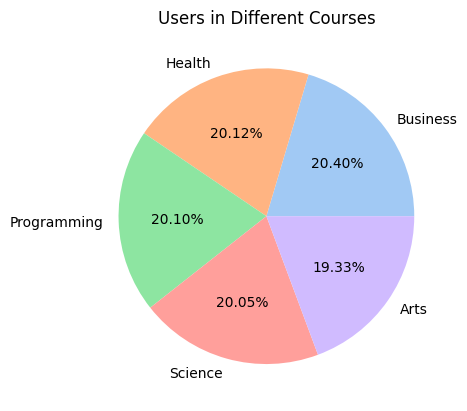

In [78]:
cc_vc=df1['CourseCategory'].value_counts()
cat=[]
val=[]
for index,value in cc_vc.items():
    #print(index,":",row)
    cat.append(index)
    val.append(value)
print(f"Categories of Course : {cat}")
print(f"Count of Course : {val}")

colors = sns.color_palette('pastel')[0:5]

plt.pie(val, labels = cat , colors=colors , autopct='%.2f%%')
plt.title('Users in Different Courses')

In [17]:
df1['DeviceType'].value_counts()
device_type_mapping = {0: 'Desktop', 1: 'Mobile'}
df1['DeviceTypeMapped'] = df1['DeviceType'].map(device_type_mapping)
df1

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,DeviceTypeMapped
0,Health,29.979719,17,3,50.365656,20.860773,1,0,Mobile
1,Arts,27.802640,1,5,62.615970,65.632415,1,0,Mobile
2,Arts,86.820485,14,2,78.458962,63.812007,1,1,Mobile
3,Science,35.038427,17,10,59.198853,95.433162,0,1,Desktop
4,Programming,92.490647,16,0,98.428285,18.102478,0,0,Desktop
...,...,...,...,...,...,...,...,...,...
8995,Health,37.445225,14,4,54.469359,32.990704,1,0,Mobile
8996,Science,48.631443,7,7,59.413257,0.254625,0,0,Desktop
8997,Health,38.212512,3,3,69.508297,70.188159,1,0,Mobile
8998,Health,70.048665,13,10,79.655182,72.975225,1,1,Mobile


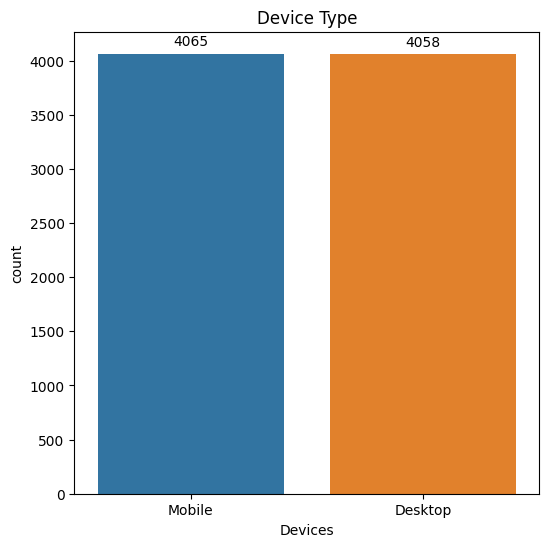

In [18]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=df1['DeviceTypeMapped'])
ax.set_title('Device Type')
ax.set_xlabel('Devices')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

In [21]:
df1['CourseCompletion'].value_counts()
course_completion_mapping = {0: 'Not Completed', 1: 'Completed'}
df1['CourseCompletionMapped'] = df1['CourseCompletion'].map(course_completion_mapping)
df1

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,DeviceTypeMapped,CourseCompletionMapped
0,Health,29.979719,17,3,50.365656,20.860773,1,0,Mobile,Not Completed
1,Arts,27.802640,1,5,62.615970,65.632415,1,0,Mobile,Not Completed
2,Arts,86.820485,14,2,78.458962,63.812007,1,1,Mobile,Completed
3,Science,35.038427,17,10,59.198853,95.433162,0,1,Desktop,Completed
4,Programming,92.490647,16,0,98.428285,18.102478,0,0,Desktop,Not Completed
...,...,...,...,...,...,...,...,...,...,...
8995,Health,37.445225,14,4,54.469359,32.990704,1,0,Mobile,Not Completed
8996,Science,48.631443,7,7,59.413257,0.254625,0,0,Desktop,Not Completed
8997,Health,38.212512,3,3,69.508297,70.188159,1,0,Mobile,Not Completed
8998,Health,70.048665,13,10,79.655182,72.975225,1,1,Mobile,Completed


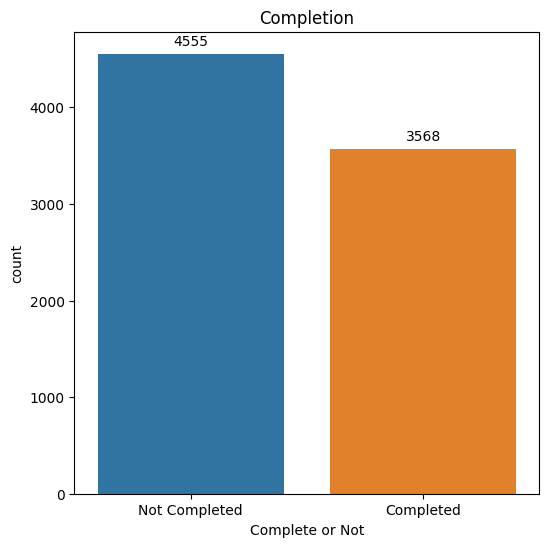

In [22]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=df1['CourseCompletionMapped'])
ax.set_title('Completion')
ax.set_xlabel('Complete or Not')


# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

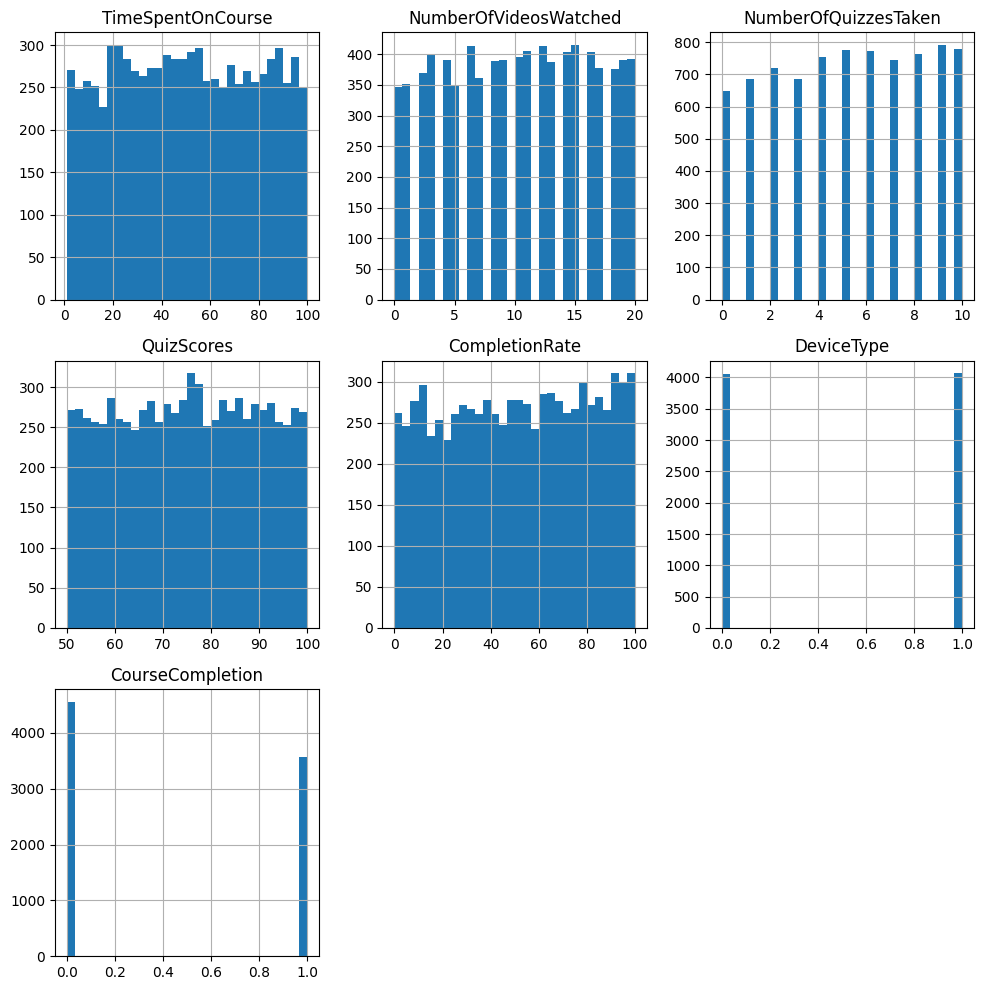

In [23]:
df1.hist(bins=30, figsize=(10, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

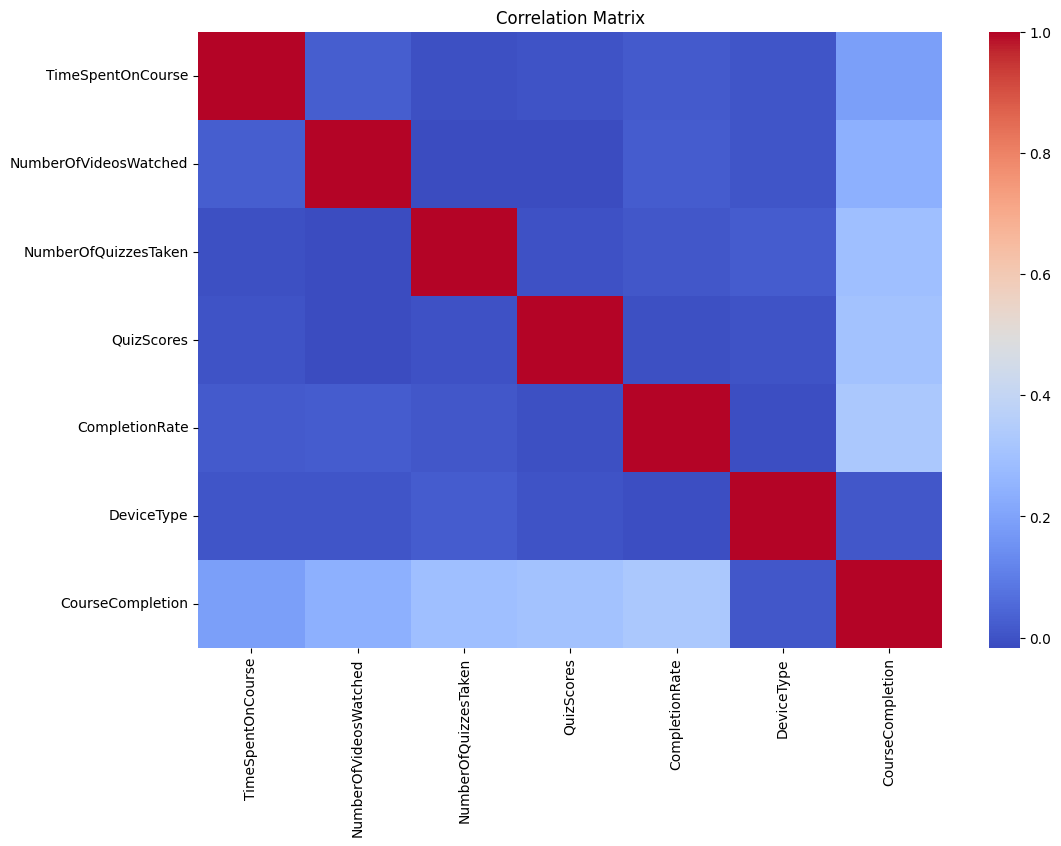

In [24]:
plt.figure(figsize=(12, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
df1['CourseCategory'].value_counts()

Business       1657
Health         1634
Programming    1633
Science        1629
Arts           1570
Name: CourseCategory, dtype: int64

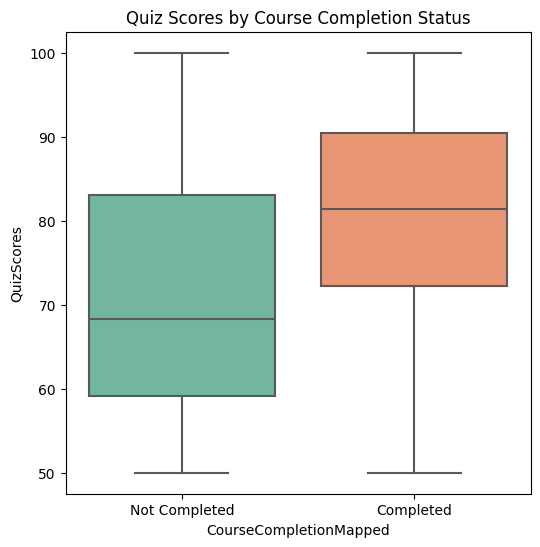

In [28]:
# Comparing quiz scores with course completion
plt.figure(figsize=(6, 6))
sns.boxplot(x='CourseCompletionMapped', y='QuizScores', data=df1, palette='Set2')
plt.title('Quiz Scores by Course Completion Status')
plt.show()

In [29]:
grouped=df1.groupby('CourseCategory')
completed = grouped.apply(lambda x: x[x['CourseCompletion'] == 1])
not_completed = grouped.apply(lambda x: x[x['CourseCompletion'] == 0])
completed,not_completed

(                    CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
 CourseCategory                                                                 
 Arts           2              Arts          86.820485                     14   
                30             Arts          64.898741                     13   
                38             Arts          26.021524                      7   
                39             Arts          46.167764                     20   
                60             Arts           3.529193                     13   
 ...                            ...                ...                    ...   
 Science        8953        Science          53.601748                     13   
                8956        Science          93.125641                     10   
                8971        Science          29.150047                     11   
                8972        Science          52.303613                     19   
                8979        

In [30]:
# Group by CourseCategory and CourseCompletion, then count
completion_counts = df1.groupby(['CourseCategory', 'CourseCompletion']).size().unstack()
completion_df=pd.DataFrame(completion_counts)
completion_df

CourseCompletion,0,1
CourseCategory,,
Arts,871,699
Business,924,733
Health,943,691
Programming,898,735
Science,919,710


In [31]:
completion_df.columns

Int64Index([0, 1], dtype='int64', name='CourseCompletion')

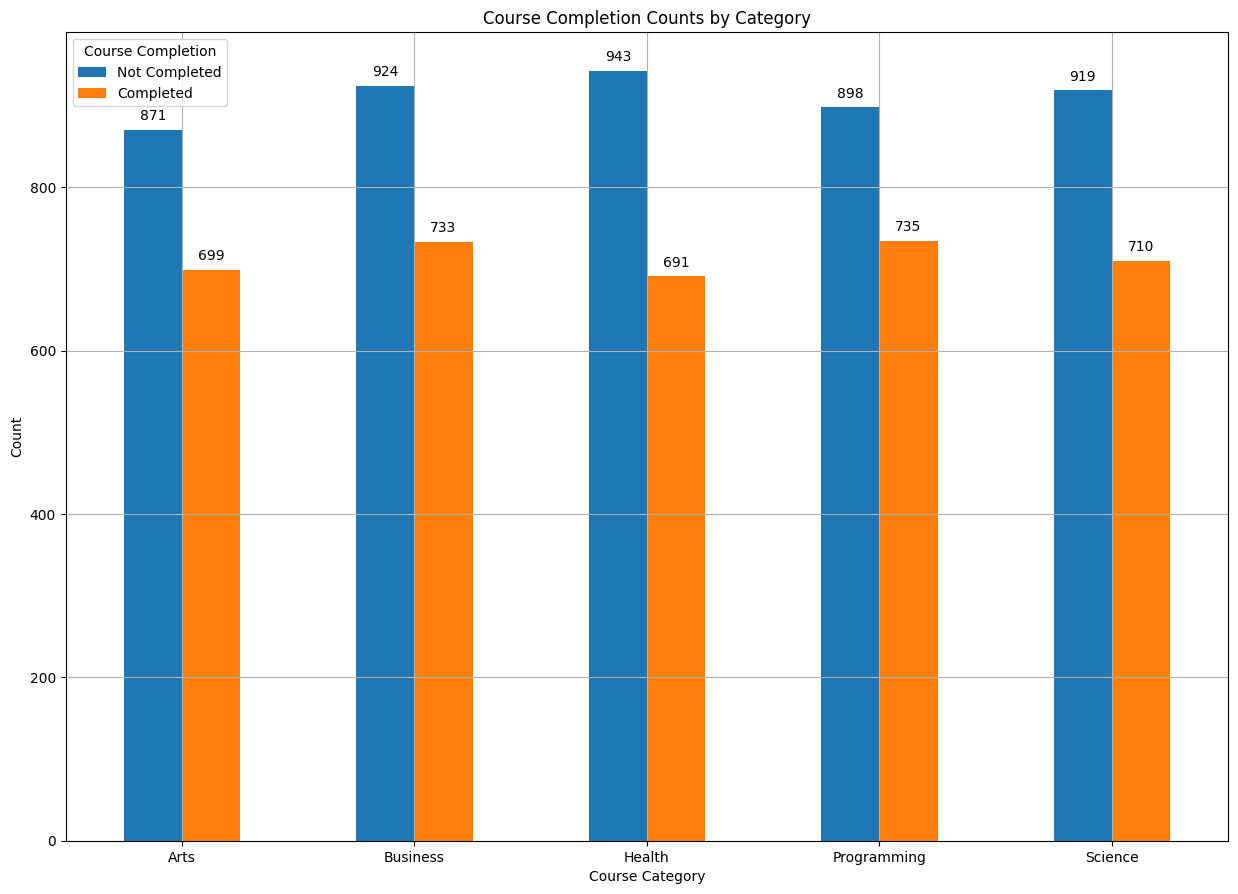

In [32]:
ax = completion_df.plot(kind='bar', figsize=(15, 10.5))

# Add labels and title
plt.xlabel('Course Category')
plt.ylabel('Count')
plt.title('Course Completion Counts by Category')
plt.xticks(rotation=0)
plt.legend(title='Course Completion', labels=['Not Completed', 'Completed'])
plt.grid()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

In [33]:
df1['TimePerVideo']=df1['TimeSpentOnCourse']/(df['NumberOfQuizzesTaken']+1)
df1

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,DeviceTypeMapped,CourseCompletionMapped,TimePerVideo
0,Health,29.979719,17,3,50.365656,20.860773,1,0,Mobile,Not Completed,7.494930
1,Arts,27.802640,1,5,62.615970,65.632415,1,0,Mobile,Not Completed,4.633773
2,Arts,86.820485,14,2,78.458962,63.812007,1,1,Mobile,Completed,28.940162
3,Science,35.038427,17,10,59.198853,95.433162,0,1,Desktop,Completed,3.185312
4,Programming,92.490647,16,0,98.428285,18.102478,0,0,Desktop,Not Completed,92.490647
...,...,...,...,...,...,...,...,...,...,...,...
8995,Health,37.445225,14,4,54.469359,32.990704,1,0,Mobile,Not Completed,7.489045
8996,Science,48.631443,7,7,59.413257,0.254625,0,0,Desktop,Not Completed,6.078930
8997,Health,38.212512,3,3,69.508297,70.188159,1,0,Mobile,Not Completed,9.553128
8998,Health,70.048665,13,10,79.655182,72.975225,1,1,Mobile,Completed,6.368060


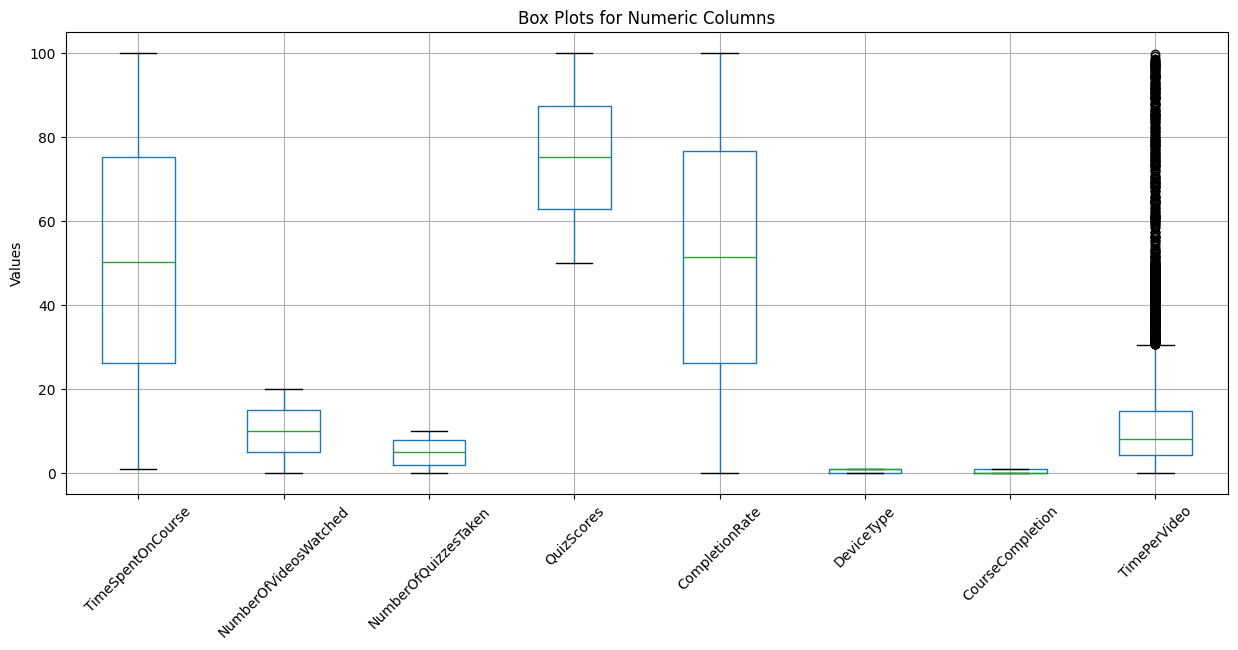

In [34]:
plt.figure(figsize=(15,6))
df1.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plots for Numeric Columns')
plt.ylabel('Values')
plt.show()

<Figure size 1500x1000 with 0 Axes>

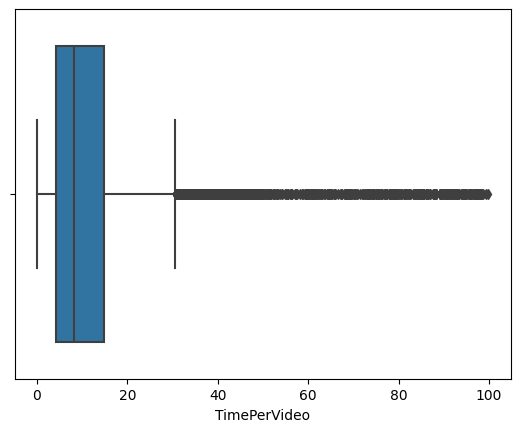

<Figure size 1500x1000 with 0 Axes>

In [35]:
sns.boxplot(x=df1['TimePerVideo'])
plt.figure(figsize=(15,10))

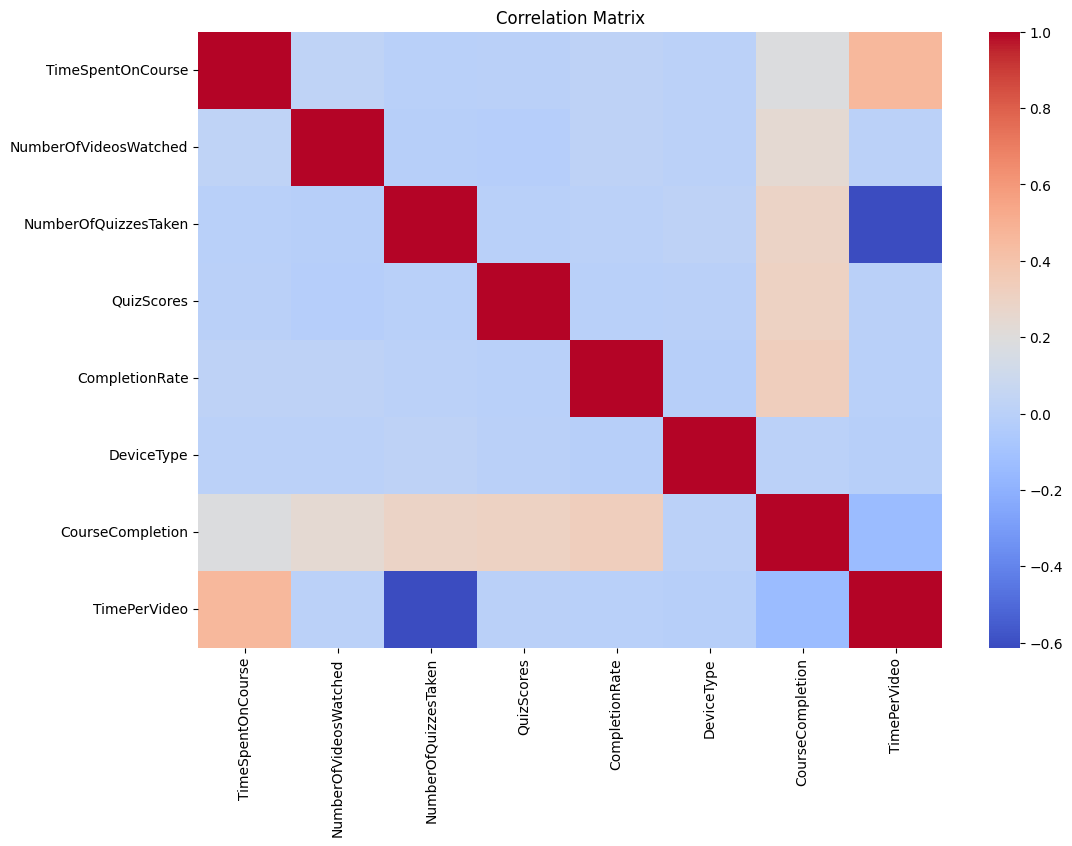

In [36]:
plt.figure(figsize=(12, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## check for the same user id if there exixt multiple courses

In [37]:
user_course_counts = df.groupby('UserID')['CourseCategory'].nunique()

users_multiple_courses = user_course_counts[user_course_counts > 1]

print(users_multiple_courses)

Series([], Name: CourseCategory, dtype: int64)


In [38]:
df1.head(10)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,DeviceTypeMapped,CourseCompletionMapped,TimePerVideo
0,Health,29.979719,17,3,50.365656,20.860773,1,0,Mobile,Not Completed,7.494930
1,Arts,27.802640,1,5,62.615970,65.632415,1,0,Mobile,Not Completed,4.633773
2,Arts,86.820485,14,2,78.458962,63.812007,1,1,Mobile,Completed,28.940162
3,Science,35.038427,17,10,59.198853,95.433162,0,1,Desktop,Completed,3.185312
4,Programming,92.490647,16,0,98.428285,18.102478,0,0,Desktop,Not Completed,92.490647
5,Health,79.466129,12,7,70.233329,76.484023,0,1,Desktop,Completed,9.933266
6,Health,78.908724,10,2,86.836533,22.588896,1,0,Mobile,Not Completed,26.302908
7,Business,12.068237,16,3,61.553646,27.410991,1,0,Mobile,Not Completed,3.017059
8,Business,81.935709,8,4,90.264564,33.308437,0,1,Desktop,Completed,16.387142
9,Programming,83.394026,15,10,63.956353,33.261300,1,0,Mobile,Not Completed,7.581275


In [39]:
df2=df.copy()

In [40]:
df2.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


In [41]:
df2.drop(['UserID'],axis=1,inplace=True)

In [42]:
df2.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df2['CourseCategory']=le.fit_transform(df2['CourseCategory'])
df2.head(10)

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0
5,2,79.466129,12,7,70.233329,76.484023,0,1
6,2,78.908724,10,2,86.836533,22.588896,1,0
7,1,12.068237,16,3,61.553646,27.410991,1,0
8,1,81.935709,8,4,90.264564,33.308437,0,1
9,3,83.394026,15,10,63.956353,33.261300,1,0


#### Since, this is classification algotrithmand i am going to work with classification algorithm like svm,logistic regression ,etc . i am using standard scaler

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
scaled_cols=['TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']

In [47]:
df2[scaled_cols]=sc.fit_transform(df2[scaled_cols])

In [48]:
df2.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,-0.727300,1.144348,-0.691888,-1.724349,-1.043422,1,0
1,0,-0.804060,-1.527840,-0.053301,-0.870013,0.496820,1,0
2,0,1.276786,0.643313,-1.011181,0.234876,0.434194,1,1
3,4,-0.548941,1.144348,1.543166,-1.108323,1.522031,0,1
4,3,1.476704,0.977336,-1.649768,1.627534,-1.138313,0,0


In [49]:
x=df2.iloc[:,0:7]
y=df2.iloc[:,7]
print(x)
print(y)

      CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0                  2          -0.727300               1.144348   
1                  0          -0.804060              -1.527840   
2                  0           1.276786               0.643313   
3                  4          -0.548941               1.144348   
4                  3           1.476704               0.977336   
...              ...                ...                    ...   
8995               2          -0.464082               0.643313   
8996               4          -0.069680              -0.525769   
8997               2          -0.437029              -1.193816   
8998               2           0.685447               0.476301   
8999               2           1.515457              -0.525769   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
0                -0.691888   -1.724349       -1.043422           1  
1                -0.053301   -0.870013        0.496820           1  


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Support Vector Machine

In [47]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_svm = svm_model.predict(x_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.86


## SVM with Hyperparameter tuning 

In [76]:
from sklearn.model_selection import GridSearchCV
params1={'C':[1,2,3,10,50,100],
       'gamma':[1,0.1,0.2,0.001,0.003],
       'kernel':['rbf','linear']}
grid1=GridSearchCV(SVC(),param_grid=params1,cv=5) #if verbos =True then can't see all cv scores
grid1.fit(x_train,y_train)

print("Grid Search SVM Best Score : ",grid1.best_score_)

accuracy_on_trained_data_svm=grid1.predict(x_train)
print(f"SVM accuracy on train data : {accuracy_score(accuracy_on_trained_data_svm,y_train): .4f}")

svm_best=grid1.best_estimator_

y_pred_best_svm = svm_best.predict(x_test)
accuracy_svm_on_test_data = accuracy_score(y_test, y_pred_best_svm)
print(f"SVM Accuracy on test data: {accuracy_svm_on_test_data:.4f}")

Grid Search SVM Best Score :  0.8879692960694208
SVM accuracy on train data :  0.9286
SVM Accuracy on test data: 0.8913


In [77]:
grid1.best_params_

{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_svm).ravel()
print(f"True Positives : {tp}")
print(f"False Positives : {fp}")
print(f"False Negatives : {fn}")
print(f"True Negatives : {tn}")

print("Precison Score : ",precision_score(y_test, y_pred_best_svm))
print("Recall Score : ",recall_score(y_test, y_pred_best_svm))

True Positives : 929
False Positives : 114
False Negatives : 151
True Negatives : 1243
Precison Score :  0.8906999041227229
Recall Score :  0.8601851851851852


# Logistic Regression 

In [48]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_log_reg = log_reg_model.predict(x_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"SVM Accuracy: {accuracy_log_reg:.4f}")

SVM Accuracy: 0.7887


## Logistic Regression with Hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg_model = LogisticRegression()

grid2= GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

grid2.fit(x_train, y_train)

print("Grid Search Logistic Regression Best Score : ",grid2.best_score_)

accuracy_on_trained_data_lg=grid2.predict(x_train)
print(f"Logistic Regression accuracy on train data : {accuracy_score(accuracy_on_trained_data_lg,y_train): .4f}")

log_reg_best=grid2.best_estimator_

y_pred_best_log = log_reg_best.predict(x_test)
accuracy_on_test_data_lg = accuracy_score(y_test, y_pred_best_log)
print(f"Logistic Regression Accuracy on test data: {accuracy_on_test_data_lg:.4f}")

Grid Search Logistic Regression Best Score :  0.79299887317935
Logistic Regression accuracy on train data :  0.7932
Logistic Regression Accuracy on test data: 0.7887


In [50]:
grid2.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [83]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_log).ravel()
print(f"True Positives : {tp}")
print(f"False Positives : {fp}")
print(f"False Negatives : {fn}")
print(f"True Negatives : {tn}")

print("Precison Score : ",precision_score(y_test, y_pred_best_log))
print("Recall Score : ",recall_score(y_test, y_pred_best_log))

True Positives : 807
False Positives : 242
False Negatives : 273
True Negatives : 1115
Precison Score :  0.76930409914204
Recall Score :  0.7472222222222222


### There is no overfitting in Logistic Regression Model since, accuracy on train data and test data are almost same and good

# Gaussion Naive Bayes

In [94]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb_train=nb_model.predict(x_train)
accuracy_nb_train= accuracy_score(y_train, y_pred_nb_train)
print(f"Naive Bayes Accuracy on train data : {accuracy_nb_train:.4f}")

# Predict using the trained model
y_pred_nb_test = nb_model.predict(x_test)

# Calculate accuracy
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print(f"Naive Bayes Accuracy on test data : {accuracy_nb_test:.4f}")

Naive Bayes Accuracy on train data : 0.8241
Naive Bayes Accuracy on test data : 0.8252


In [84]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nb_test).ravel()
print(f"True Positives : {tp}")
print(f"False Positives : {fp}")
print(f"False Negatives : {fn}")
print(f"True Negatives : {tn}")

print("Precison Score : ",precision_score(y_test, y_pred_nb_test))
print("Recall Score : ",recall_score(y_test, y_pred_nb_test))

True Positives : 811
False Positives : 157
False Negatives : 269
True Negatives : 1200
Precison Score :  0.8378099173553719
Recall Score :  0.7509259259259259


# Decision Tree

In [51]:
# Initialize and train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_tree = tree_model.predict(x_test)

accuracy=accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.91


## Decision Tree with Hyperparameter Tuning

In [52]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_clf = DecisionTreeClassifier(random_state=42)

grid3 = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

grid3.fit(x_train, y_train)

print(f"Decision Tree Grid Best Score : {grid3.best_score_: .4f}")

dt_clf_train=grid3.predict(x_train)
print(f"Decision Tree accuracy on train data : {accuracy_score(y_train,dt_clf_train) : .4f}")

dt_clf_best=grid3.best_estimator_

y_pred_dt_test = dt_clf_best.predict(x_test)

# Calculate accuracy
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print(f"Decision Tree Accuracy on test data: {accuracy_dt_test:.4f}")



Decision Tree Grid Best Score :  0.9462
Decision Tree accuracy on train data :  0.9601
Decision Tree Accuracy on test data: 0.9520


In [53]:
grid3.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [54]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt_test).ravel()
print(f"True Positives : {tp}")
print(f"False Positives : {fp}")
print(f"False Negatives : {fn}")
print(f"True Negatives : {tn}")

print("Precison Score : ",precision_score(y_test, y_pred_dt_test))
print("Recall Score : ",recall_score(y_test, y_pred_dt_test))

True Positives : 1004
False Positives : 41
False Negatives : 76
True Negatives : 1316
Precison Score :  0.9607655502392345
Recall Score :  0.9296296296296296


## Feature Importance for best classifier(Decision Tree)

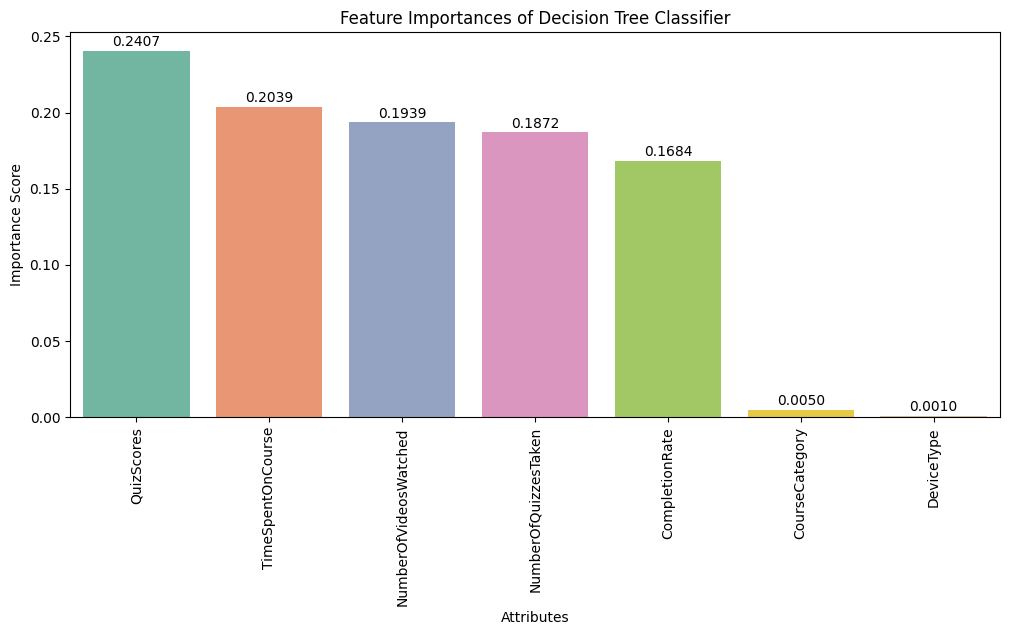

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dt_clf_best is your trained Decision Tree model
importances = dt_clf_best.feature_importances_

# Get indices to sort feature importances
indices = np.argsort(importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=[x.columns[i] for i in indices], y=importances[indices], palette='Set2')
plt.title('Feature Importances of Decision Tree Classifier')
plt.xticks(rotation=90)

# Annotate each bar with the feature importance value
for i in range(len(importances)):
    ax.text(i, importances[indices][i] + 0.0009, f'{importances[indices][i]:.4f}', 
            ha='center', va='bottom')

plt.ylabel('Importance Score')    
plt.xlabel('Attributes')    
plt.show()


### The feature importance plot of the Decision Tree classifier suggests a well-balanced model where no single feature dominates, with multiple features contributing meaningfully to predictions.